In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv(r"C:\Users\19692\Downloads\carinfo_after_pre_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           10346 non-null  int64  
 1   year                                 10346 non-null  int64  
 2   make                                 10346 non-null  object 
 3   model                                10346 non-null  object 
 4   price                                10346 non-null  int64  
 5   mileage                              10346 non-null  int64  
 6   Miles per gallon                     9658 non-null   object 
 7   Transmission                         9858 non-null   object 
 8   owner                                10346 non-null  float64
 9   VIN                                  10346 non-null  object 
 10  class                                10346 non-null  object 
 11  Auction Brand / Issues      

In [3]:
# column <Miles per gallon> contains data like 24 city/ 17 hwy indicates a car's different mpg in city driving and highway driving
# I sepreated it into two different columns <city_mpg> and <hwy_mpg>
miles_per_gallon=data["Miles per gallon"]
miles_per_gallon
data[['city_mpg', 'hwy_mpg']] = data['Miles per gallon'].str.split('/', expand=True)
data=data.dropna(subset=['city_mpg','hwy_mpg'])
data['city_mpg'] = data['city_mpg'].str.extract('(\d+)').astype(int)
data['hwy_mpg'] = data['hwy_mpg'].str.extract('(\d+)').astype(int)

In [4]:
# make <Open Recall Check> column only contains numeric number, 0 means no recalls
data['Open Recall Check']=data['Open Recall Check'].str.split(" ").str[0]
data['Open Recall Check'] = pd.to_numeric(data['Open Recall Check'], errors='coerce')
data['Open Recall Check'] = data['Open Recall Check'].fillna(0)
data['Open Recall Check']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
10341    2.0
10342    0.0
10343    1.0
10344    1.0
10345    0.0
Name: Open Recall Check, Length: 9588, dtype: float64

In [12]:
label_encoder = LabelEncoder()

data=data.dropna(subset=['Accident / Damage'])
data['accident_encoded']=label_encoder.fit_transform(data['Accident / Damage'])
damage_mapping=dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
reverse_damage_mapping={v:k for k,v in damage_mapping.items()}

data=data.dropna(subset=['fuel']) # drop column NA
data['fuel_encoded'] = label_encoder.fit_transform(data['fuel'])
fuel_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
reverse_fuel_mapping={v:k for k,v in fuel_mapping.items()}

data=data.dropna(subset=['Drive type'])
data['drive_type_encoded']=label_encoder.fit_transform(data['Drive type'])
drive_type_mapping= dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
reverse_drive_type_mapping={v:k for k,v in drive_type_mapping.items()}

{0: 'All Wheel Drive', 1: 'Four Wheel Drive', 2: 'Front Wheel Drive', 3: 'Rear Wheel Drive'}


# Question 1: What features could be affected by mileage?

Mileage is a crucial feature that significantly impacts a car's resale value. In Phase I, my analysis focused on how mileage affects resale value across different car brands, concluding that, in general, resale value negatively correlates with mileage and that this trend varies across brands. To better understand why mileage impacts resale value, it is necessary to refine the question and explore the relationship between mileage and additional features. The correlations found can serve as indicators of how mileage influences a car's overall condition, potentially explaining why increased mileage leads to decreased prices.

## Hypothesis 1 & 2
The first two hypotheses remains the same as phase I, study the relationship between mileage and resale price across different brands.

## Hypothesis 3: Other features such as mileage per gallon and owners may also have a correlation with mileage.

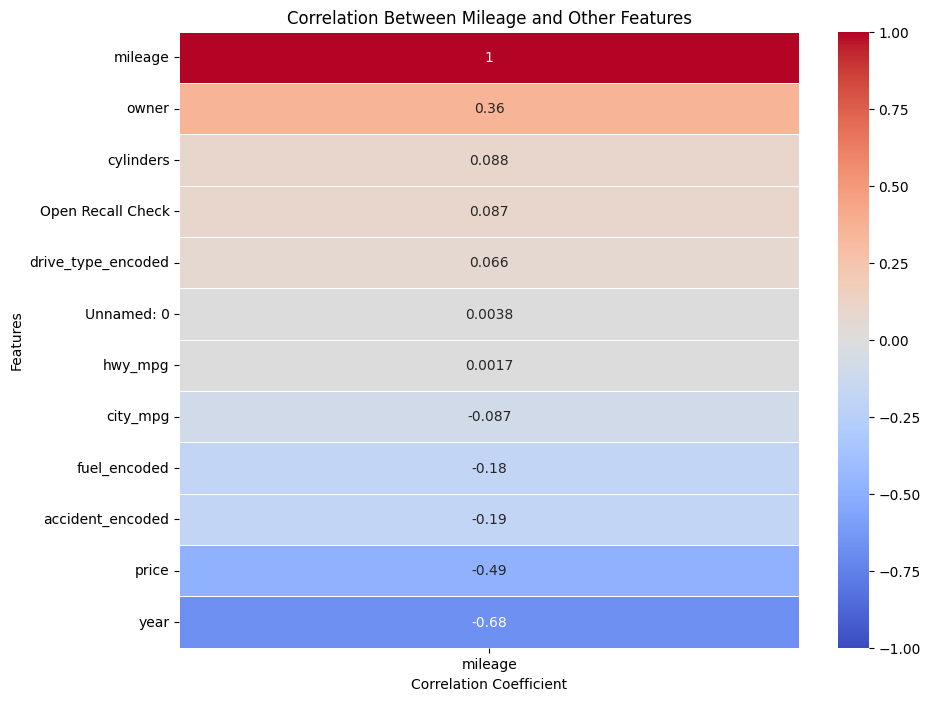

In [6]:
correlation_matrix = data.corr(numeric_only=True)[['mileage']].sort_values(by='mileage', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Between Mileage and Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

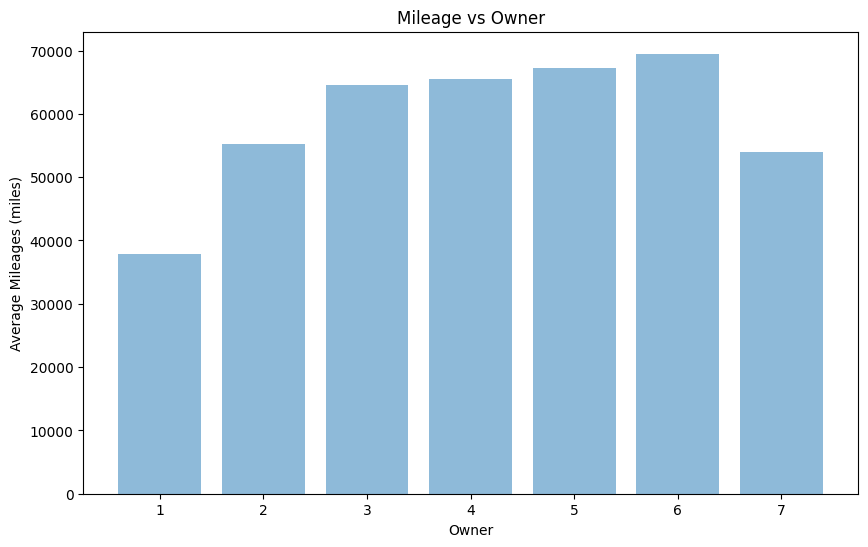

In [14]:
owner_mileage_mean = data.groupby('owner')['mileage'].mean()

plt.figure(figsize=(10,6))
plt.bar(owner_mileage_mean.index,owner_mileage_mean,alpha=0.5)
plt.title('Mileage vs Owner')
plt.xlabel('Owner')
plt.ylabel('Average Mileages (miles)')
plt.show()

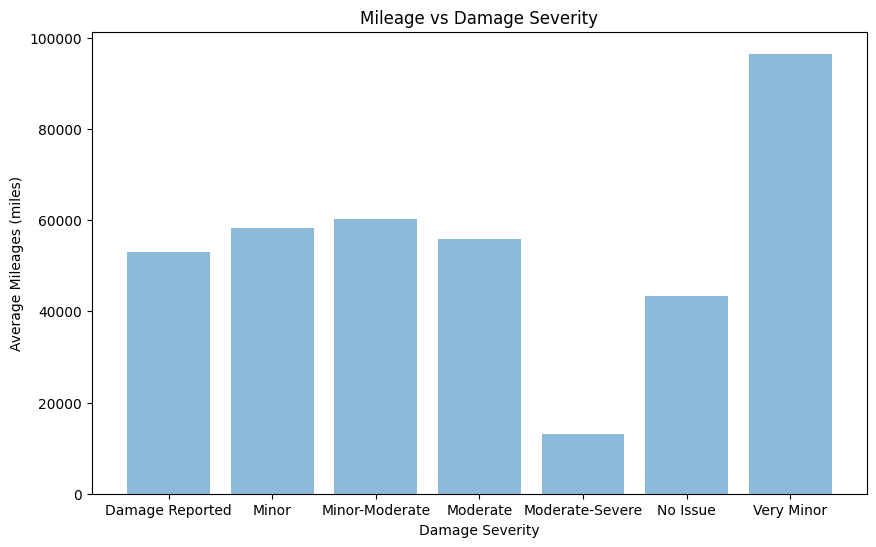

In [13]:
accident_mileage_mean = data.groupby('accident_encoded')['mileage'].mean()
accident_mileage_mean.index=accident_mileage_mean.index.map(reverse_damage_mapping)


plt.figure(figsize=(10,6))
plt.bar(accident_mileage_mean.index,accident_mileage_mean,alpha=0.5)
plt.title('Mileage vs Damage Severity')
plt.xlabel('Damage Severity')
plt.ylabel('Average Mileages (miles)')
plt.show()

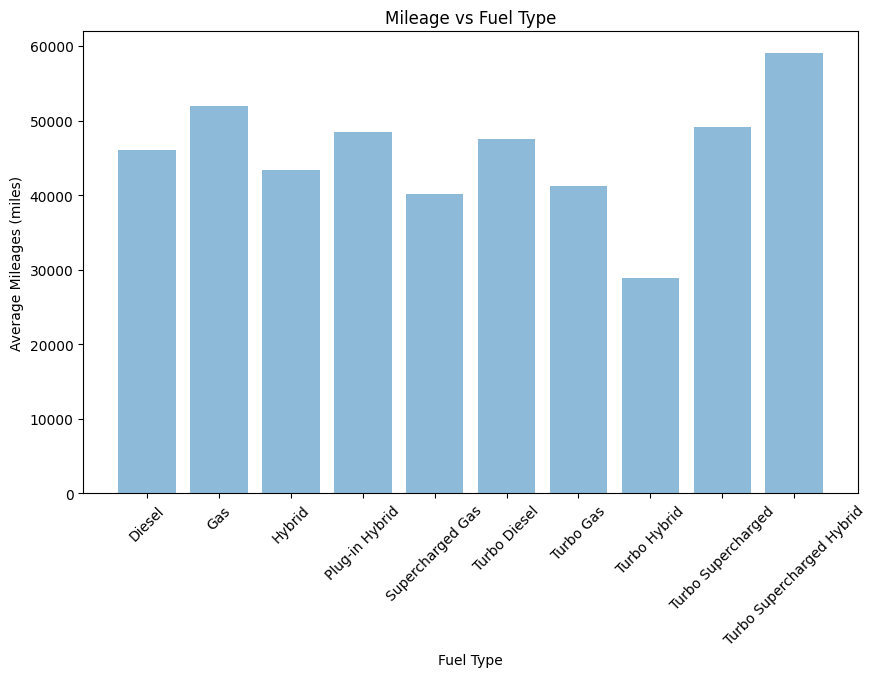

In [16]:
fuel_mileage_mean = data.groupby('fuel_encoded')['mileage'].mean()
fuel_mileage_mean.index=fuel_mileage_mean.index.map(reverse_fuel_mapping)


plt.figure(figsize=(10,6))
plt.bar(fuel_mileage_mean.index,fuel_mileage_mean,alpha=0.5)
plt.title('Mileage vs Fuel Type')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45) 
plt.ylabel('Average Mileages (miles)')
plt.show()

In [17]:
output_file_path = 'processed_data_mileage.csv' 

data.to_csv(output_file_path, index=False)